In [1]:
# 참고 자료~~
# 방법론의 메인 논문 : https://arxiv.org/pdf/1511.06335.pdf
# 참고 : https://leedakyeong.tistory.com/entry/%EB%85%BC%EB%AC%B8Unsupervised-Deep-Embedding-for-Clustering-AnalysisDEC

In [2]:
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import callbacks
from tensorflow.keras.initializers import VarianceScaling




from tensorflow.keras.utils import plot_model
from IPython.display import Image



import os


%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\Jang\Desktop\project\194_후보지.csv",encoding="cp949")
data.head()

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907
2,관악구청,37.488761,126.957115,0.075237,0.000000,0.324941,0.388215,0.143114,0.421154,0.320338
3,신사동주민센터,37.485419,126.918117,0.109569,0.000000,0.361444,0.450807,0.223698,0.378846,0.336677
4,은천동주민센터,37.485247,126.942418,0.081081,0.036168,0.256804,0.606586,0.270794,0.715385,0.416873


In [4]:
data.shape

(194, 10)

In [5]:
# 불필요 컬럼 제거
data_x = data.drop(['name'], axis=1)
data_x.head()

,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482
1,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907
2,37.488761,126.957115,0.075237,0.000000,0.324941,0.388215,0.143114,0.421154,0.320338
3,37.485419,126.918117,0.109569,0.000000,0.361444,0.450807,0.223698,0.378846,0.336677
4,37.485247,126.942418,0.081081,0.036168,0.256804,0.606586,0.270794,0.715385,0.416873


In [6]:
numeric_columns = data_x.columns.values.tolist()
scaler = MinMaxScaler() 
data_x[numeric_columns] = scaler.fit_transform(data_x[numeric_columns])
data_x.head()

,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,0.472087,1.000000,0.416073,1.00000,0.801493,0.189441,0.916795,0.019380,0.757015
1,0.484102,0.780847,0.173957,0.43478,0.024581,0.496534,0.704463,0.470930,0.137542
2,0.839493,0.700718,0.097660,0.00000,0.202640,0.388215,0.143114,0.416667,0.572121
3,0.739098,0.225704,0.145473,0.00000,0.247809,0.450807,0.223698,0.374031,0.601410
4,0.733942,0.521708,0.105799,0.04004,0.118328,0.606586,0.270794,0.713178,0.745168


In [7]:
# 빵구난 데이터 확인
data_x.isnull().sum()

위도                  0
경도                  0
유동인구                0
후보지-쓰레기통            0
후보지-슈퍼빈             0
1인가구수               0
지역 평균 임대료           0
1000m restaurant    0
target              0
dtype: int64

In [8]:
### df에서 값만 추출 
x = data_x.values
x.shape

(194, 9)

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
for num_clusters in range(2,60):
    clusterer = KMeans(n_clusters=num_clusters)
    preds = clusterer.fit_predict(x)
    # centers = clusterer.cluster_centers_
    score = silhouette_score (x, preds, metric='euclidean')
    print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, Kmeans silhouette score is 0.26690338890880744)
For n_clusters = 3, Kmeans silhouette score is 0.31326156807502625)
For n_clusters = 4, Kmeans silhouette score is 0.3075139461787704)
For n_clusters = 5, Kmeans silhouette score is 0.31279426556139167)
For n_clusters = 6, Kmeans silhouette score is 0.31878864663809364)
For n_clusters = 7, Kmeans silhouette score is 0.3057011225783106)
For n_clusters = 8, Kmeans silhouette score is 0.31080017117721825)
For n_clusters = 9, Kmeans silhouette score is 0.33070014292907)
For n_clusters = 10, Kmeans silhouette score is 0.3109503013763174)
For n_clusters = 11, Kmeans silhouette score is 0.33276045162066553)
For n_clusters = 12, Kmeans silhouette score is 0.32744941298143393)
For n_clusters = 13, Kmeans silhouette score is 0.35498433637553184)
For n_clusters = 14, Kmeans silhouette score is 0.36771963303149463)
For n_clusters = 15, Kmeans silhouette score is 0.3620775468383786)
For n_clusters = 16, Kmeans silhouette score is 0

In [11]:
###############################################################
# Try) 적당한 여러개의 값에 대해서 다 해보기!!!아래의 프로세스를!!!!!
n_clusters = 10
###############################################################


kmeans = KMeans(n_clusters=n_clusters)
y_pred_kmeans = kmeans.fit_predict(x)
y_pred_kmeans

array([4, 9, 2, 2, 2, 9, 7, 6, 1, 1, 3, 1, 3, 5, 3, 4, 6, 9, 9, 6, 6, 6,
       6, 5, 3, 3, 0, 8, 5, 0, 5, 3, 5, 5, 2, 1, 1, 1, 2, 5, 4, 8, 4, 7,
       5, 5, 0, 6, 8, 3, 1, 0, 1, 6, 1, 2, 2, 0, 1, 1, 7, 4, 0, 0, 5, 2,
       0, 0, 9, 3, 2, 5, 1, 5, 1, 0, 8, 5, 1, 8, 9, 4, 5, 0, 1, 1, 1, 8,
       6, 4, 5, 5, 2, 1, 2, 0, 6, 0, 1, 1, 0, 6, 8, 3, 7, 1, 1, 6, 2, 7,
       1, 9, 1, 0, 6, 0, 2, 1, 7, 5, 1, 5, 9, 9, 1, 5, 7, 1, 2, 2, 5, 7,
       4, 0, 2, 9, 5, 0, 1, 5, 4, 6, 3, 1, 3, 2, 2, 1, 2, 3, 1, 3, 4, 1,
       0, 5, 7, 2, 7, 1, 9, 9, 5, 5, 5, 2, 1, 5, 5, 3, 3, 3, 5, 5, 5, 5,
       6, 6, 6, 8, 8, 5, 5, 8, 8, 3, 3, 3, 5, 3, 5, 5, 5, 8])

In [12]:
# autoencdoer 모델 설계

In [13]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected symmetric auto-encoder model.
  
    dims: list of the sizes of layers of encoder like [500, 500, 2000, 10]. 
          dims[0] is input dim, dims[-1] is size of the latent hidden layer.

    act: activation function
    
    return:
        (autoencoder_model, encoder_model): Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers of encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # latent hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded
    # internal layers of decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # decoder output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    
    decoded = x
    
    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model     = Model(inputs=input_data, outputs=encoded, name='encoder')
    
    return autoencoder_model, encoder_model

In [14]:
###############################################################
n_epochs   = 100
batch_size = 128
###############################################################

dims = [x.shape[-1], 500, 500, 2000, 10] 
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')


###############################################################
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = n_epochs
batch_size = batch_size
###############################################################

os.mkdir(r"C:\Users\Jang\Desktop\project\results")
save_dir = r'C:\Users\Jang\Desktop\project\results'

print(dims)
autoencoder, encoder = autoencoder(dims, init=init)

[9, 500, 500, 2000, 10]


C:\Users\Jang\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs)
autoencoder.save_weights(save_dir + '/ae_weights.h5')

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 0.2133
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0706
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 0.1244
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0882
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0623
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0685
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0576
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0583
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0560
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0568
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0562
Epoch 12/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0554
Epoch 13/100
2/2 [==============================]

In [17]:
autoencoder.save_weights(save_dir + '/ae_weights.h5')
autoencoder.load_weights(save_dir + '/ae_weights.h5')

In [19]:
class ClusteringLayer(Layer):
    '''
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.
    '''

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform') 
        
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        ''' 
        student t-distribution, as used in t-SNE algorithm.
        It measures the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
       
        inputs: the variable containing data, shape=(n_samples, n_features)
        
        Return: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        '''
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure all of the values of each sample sum up to 1.
        
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [20]:
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

###############################################################
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')
###############################################################

In [21]:
# # 위의 모델에 대한 시각화
# plot_model(model, to_file='model.png', show_shapes=True)
# Image(filename='model.png')

In [22]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))
y_pred_last = np.copy(y_pred)

In [23]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [25]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [26]:
loss = 0
index = 0

maxiter = 1000 # 8000
update_interval = 100 # 140
tol = 0.001 # tolerance threshold to stop training

index_array = np.arange(x.shape[0])



In [27]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0



In [28]:
# 위에서 학습한 모델에 대한 저장...
model.save_weights(save_dir + '/DEC_model_final.h5')
model.load_weights(save_dir + '/DEC_model_final.h5')

In [29]:
########### 학습한 것을 바탕으로 클러스터링 예측...

In [30]:
# Eval.
q = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)

In [31]:
data_all = data_x.copy()

In [32]:
data_all['cluster'] = y_pred

In [33]:
data_all.head()

,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target,cluster
0,0.472087,1.000000,0.416073,1.00000,0.801493,0.189441,0.916795,0.019380,0.757015,3
1,0.484102,0.780847,0.173957,0.43478,0.024581,0.496534,0.704463,0.470930,0.137542,7
2,0.839493,0.700718,0.097660,0.00000,0.202640,0.388215,0.143114,0.416667,0.572121,2
3,0.739098,0.225704,0.145473,0.00000,0.247809,0.450807,0.223698,0.374031,0.601410,8
4,0.733942,0.521708,0.105799,0.04004,0.118328,0.606586,0.270794,0.713178,0.745168,0


In [34]:
data_all['cluster'].value_counts()

6    38
0    23
5    23
8    22
9    20
1    20
4    16
7    12
3    10
2    10
Name: cluster, dtype: int64

In [35]:
len(np.unique(data_all['cluster']))

10

In [36]:
import numpy as np
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(x)

x_embedded.shape

C:\Users\Jang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Jang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(194, 2)

In [37]:
len(np.unique(y_pred))

10

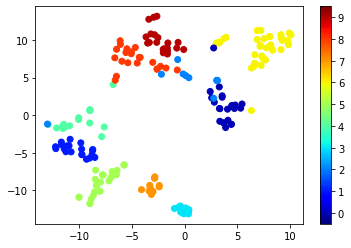

In [38]:
# 데이터에만 기반해서 2D로 시각화
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]
plt.scatter(vis_x, vis_y, c=y_pred, cmap=plt.cm.get_cmap("jet", 256))
plt.colorbar(ticks=range(256))
plt.clim(-0.5, 9.5)
plt.show()

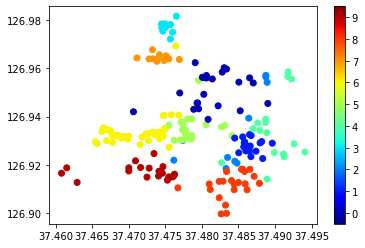

In [39]:

path = r"C:\Users\Jang\Desktop\project\194_후보지.csv"

data_temp = pd.read_csv(path, encoding="cp949")
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]
plt.scatter(data_temp["위도"], data_temp["경도"], c=y_pred, cmap=plt.cm.get_cmap("jet", 256))
plt.colorbar(ticks=range(256))
plt.clim(-0.5, 9.5)
plt.show()

In [40]:
#### 이를 바탕으로 좀 더 refining 작업 수행

In [41]:
# Need to re-run autoencoder function declaration!!!
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_data, outputs=decoded, name='AE'), Model(inputs=input_data, outputs=encoded, name='encoder')

In [42]:
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.load_weights(save_dir + '/ae_weights.h5')
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=[clustering_layer, autoencoder.output])

# plot_model(model, to_file='model.png', show_shapes=True)
# Image(filename='model.png') 

In [43]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])
y_pred_last = np.copy(y_pred)

In [44]:
model.compile(loss=['kld', 'mse'], loss_weights=[0.1, 1], optimizer=pretrain_optimizer)

In [45]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q, _  = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)

        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=[p[idx], x[idx]])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0



delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.


In [46]:
model.save_weights(save_dir + '/b_DEC_model_final.h5')
model.load_weights(save_dir + '/b_DEC_model_final.h5')

In [47]:
# evaluation of model prediction 
q, _ = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)

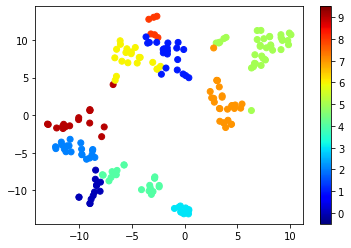

In [48]:
plt.scatter(vis_x, vis_y, c=y_pred, cmap=plt.cm.get_cmap("jet", 256))
plt.colorbar(ticks=range(256))
plt.clim(-0.5, 9.5)
plt.show()

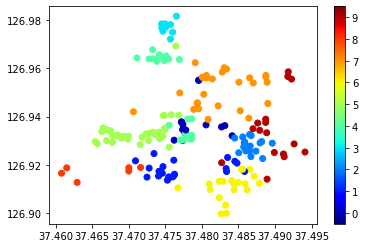

In [49]:
path = r"C:\Users\Jang\Desktop\project\194_후보지.csv"

data_temp = pd.read_csv(path, encoding="cp949")
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]
plt.scatter(data_temp["위도"], data_temp["경도"], c=y_pred, cmap=plt.cm.get_cmap("jet", 256))
plt.colorbar(ticks=range(256))
plt.clim(-0.5, 9.5)
plt.show()

In [50]:
len(np.unique(y_pred))

10

In [51]:
data_temp["dnncluster"] = y_pred

In [52]:
df_candi = pd.read_csv(r"C:\Users\Jang\Desktop\project\194_후보지.csv",encoding="cp949")

In [53]:
data_temp

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target,dnncluster
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482,3
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907,4
2,관악구청,37.488761,126.957115,0.075237,0.000000,0.324941,0.388215,0.143114,0.421154,0.320338,7
3,신사동주민센터,37.485419,126.918117,0.109569,0.000000,0.361444,0.450807,0.223698,0.378846,0.336677,6
4,은천동주민센터,37.485247,126.942418,0.081081,0.036168,0.256804,0.606586,0.270794,0.715385,0.416873,7
...,...,...,...,...,...,...,...,...,...,...,...
189,성지빌딩,37.478620,126.930836,0.355734,0.239711,0.175550,0.478869,1.000000,0.567308,0.165396,4
190,서림동주민센터,37.474863,126.934998,0.090577,0.350815,0.196814,0.481936,0.096186,0.657692,0.476326,5
191,삼성동시장,37.469281,126.931499,0.227904,0.418073,0.196282,0.271231,0.000000,0.509615,0.499134,5
192,유완약국.성림교회,37.466976,126.930049,0.287801,0.480865,0.286505,0.271231,0.000000,0.426923,0.559032,5


In [54]:
# data_zero = data_temp[data_temp["dnncluster"]==0]
# data_one = data_temp[data_temp["dnncluster"]==1]
# data_two = data_temp[data_temp["dnncluster"]==2]
# data_three = data_temp[data_temp["dnncluster"]==3]
# data_four = data_temp[data_temp["dnncluster"]==4]
# data_five = data_temp[data_temp["dnncluster"]==5]
# data_six = data_temp[data_temp["dnncluster"]==6]
# data_seven = data_temp[data_temp["dnncluster"]==7]
# data_eight = data_temp[data_temp["dnncluster"]==8]
# data_nine = data_temp[data_temp["dnncluster"]==9]


# median 

In [55]:
df_demand = pd.read_csv(r"C:\Users\Jang\Desktop\project\demand_list.csv",encoding="cp949")

In [56]:
import math
import random
from pyscipopt import Model, quicksum, multidict
from haversine import haversine


def kmedian(I,J,c,k):
    """kmedian -- minimize total cost of servicing customers from k facilities
    Parameters:
        - I: set of customers
        - J: set of potential facilities
        - c[i,j]: cost of servicing customer i from facility j
        - k: number of facilities to be used
    Returns a model, ready to be solved.
    """

    model = Model("k-median")
    x,y = {},{}

    for j in J:
        y[j] = model.addVar(vtype="B", name="y(%s)"%j)
        for i in I:
            x[i,j] = model.addVar(vtype="B", name="x(%s,%s)"%(i,j))

    for i in I:
        model.addCons(quicksum(x[i,j] for j in J) == 1, "Assign(%s)"%i)
        for j in J:
            model.addCons(x[i,j] <= y[j], "Strong(%s,%s)"%(i,j))
    model.addCons(quicksum(y[j] for j in J) == k, "Facilities")

    model.setObjective(quicksum(c[i,j]*x[i,j] for i in I for j in J), "minimize")
    model.data = x,y

    return model


def distance(x1,y1,x2,y2):
    return haversine((x1,y1), (x2,y2))

In [57]:
last = []
I = df_demand.index

for k in range(10):
    data = data_temp[data_temp["dnncluster"]==k]
    J = data.index
    x_demand = df_demand["위도"].apply(lambda x : x)    # positions of the points in the plane
    y_demand = df_demand["경도"].apply(lambda x : x)  
    x_candi = data["위도"].apply(lambda x : x)       # positions of the points in the plane
    y_candi = data["경도"].apply(lambda x : x)  
    c = {}

    w = data["target"]

    for i in I:
        for j in J:
            c[i,j] = distance(x_demand[i],y_demand[i],x_candi[j],y_candi[j])* w[j]

    random.seed(67)

    k = 1
    model = kmedian(I,J,c,k)
    # model.Params.Threads = 1
    model.optimize()
    EPS = 1.e-1
    x,y = model.data
    edges = [(i,j) for (i,j) in x if model.getVal(x[i,j]) > EPS]
    facilities = [j for j in y if model.getVal(y[j]) > EPS]
    
    last.append(facilities[0])

In [58]:
last

[144, 147, 67, 140, 170, 175, 127, 129, 110, 158]

In [59]:
# m

In [60]:
def color(data_temp):

    for i in data_temp.index:
        if data_temp.loc[i,"dnncluster"] == 0:
            data_temp.loc[i,"dnncluster"] ='blue'
        elif data_temp.loc[i,"dnncluster"] == 1:
            data_temp.loc[i,"dnncluster"] ='green'
        elif data_temp.loc[i,"dnncluster"] == 2:
            data_temp.loc[i,"dnncluster"] ='purple'
        elif data_temp.loc[i,"dnncluster"] == 3:
            data_temp.loc[i,"dnncluster"] ='orange'
        elif data_temp.loc[i,"dnncluster"] == 4:
            data_temp.loc[i,"dnncluster"] ='gray'
        elif data_temp.loc[i,"dnncluster"] == 5:
            data_temp.loc[i,"dnncluster"] ='black'
        elif data_temp.loc[i,"dnncluster"] == 6:
            data_temp.loc[i,"dnncluster"] ='gray'
        elif data_temp.loc[i,"dnncluster"] == 7:
            data_temp.loc[i,"dnncluster"] ='white'
        elif data_temp.loc[i,"dnncluster"] == 8:
            data_temp.loc[i,"dnncluster"] ='lightblue'
        elif data_temp.loc[i,"dnncluster"] == 9:
            data_temp.loc[i,"dnncluster"] ='beige'

        else:
            pass
    return data_temp

In [61]:
color(data_temp)

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target,dnncluster
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482,orange
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907,gray
2,관악구청,37.488761,126.957115,0.075237,0.000000,0.324941,0.388215,0.143114,0.421154,0.320338,white
3,신사동주민센터,37.485419,126.918117,0.109569,0.000000,0.361444,0.450807,0.223698,0.378846,0.336677,gray
4,은천동주민센터,37.485247,126.942418,0.081081,0.036168,0.256804,0.606586,0.270794,0.715385,0.416873,white
...,...,...,...,...,...,...,...,...,...,...,...
189,성지빌딩,37.478620,126.930836,0.355734,0.239711,0.175550,0.478869,1.000000,0.567308,0.165396,gray
190,서림동주민센터,37.474863,126.934998,0.090577,0.350815,0.196814,0.481936,0.096186,0.657692,0.476326,black
191,삼성동시장,37.469281,126.931499,0.227904,0.418073,0.196282,0.271231,0.000000,0.509615,0.499134,black
192,유완약국.성림교회,37.466976,126.930049,0.287801,0.480865,0.286505,0.271231,0.000000,0.426923,0.559032,black


In [62]:
data_temp["dnncluster"].unique()

array(['orange', 'gray', 'white', 'beige', 'green', 'lightblue', 'purple',
       'black', 'blue'], dtype=object)

In [63]:
import folium


cc = []
tv = []

for i in data_temp.index:   
    cc.append(data_temp.loc[i,"위도"]) #위도
    tv.append(data_temp.loc[i,"경도"]) #경도    

m = folium.Map(
    location = (sum(cc)/len(cc), sum(tv)/len(tv)),
)
    
for i in range(len(cc)):
    cm = cc[i],tv[i]
    folium.Circle(
        cm,
        radius =30,
        color=data_temp.loc[i,"dnncluster"]
    ).add_to(m)

In [64]:
for i in last:
    cm = data_temp.loc[i,"위도"],data_temp.loc[i,"경도"]
    folium.Circle(
            cm,
            radius =30,
            color='red'
        ).add_to(m)

In [65]:
m

In [66]:
m.save("dnn_k=10.html")

In [69]:
data_temp.loc[last,:].to_csv("dnn_10.csv",encoding = "cp949",index=False)

In [70]:
data_temp.to_csv("dnn_10 clustering.csv",encoding = "cp949",index=False)